<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/3102947/5344155/d4f2d9d63736fff7b6ba10f73774752e/dataset-cover.png?t=2023-04-08-06-42-24" alt="Alt Text">
</p>



# Import Libraries


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Import Machine Learning Algorithms
from sklearn.model_selection import train_test_split  # Split data into training and testing sets for model evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression for classification tasks
from sklearn.neighbors import KNeighborsClassifier  # KNN for classification

# Import Ensemble Learning Algorithms (combining multiple models for better performance)
from sklearn.ensemble import RandomForestClassifier  # Random Forest for robust classification
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting for decision tree-based learning with improved accuracy

# Evaluation Metrics (assessing model performance)
from sklearn.metrics import confusion_matrix  # Visualize model predictions vs. true labels
from sklearn.metrics import accuracy_score, recall_score, f1_score  # Calculate common performance metrics



# Import Data set

In [60]:
import pandas as pd
df = pd.read_csv
df = pd.read_csv('diabetes-dataset.zip')

# Print Data set


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Summary Of Data

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Data Analysis Process 

<Axes: >

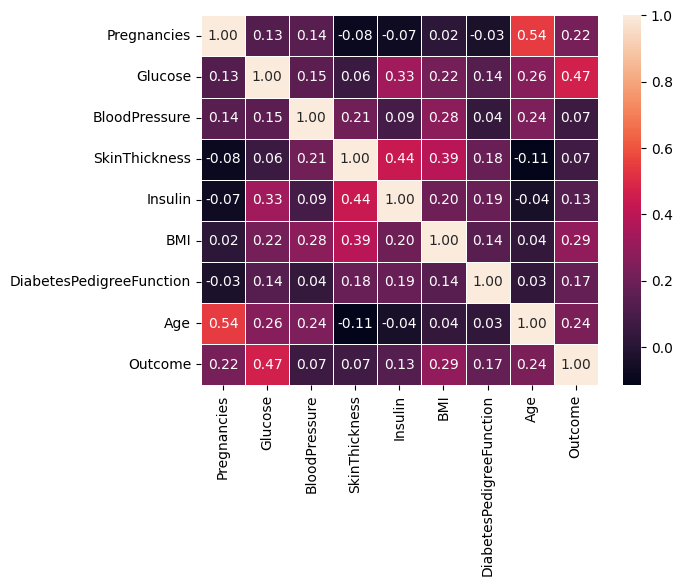

In [15]:
sns.heatmap(df.corr(),annot =True,fmt = '0.2f',linewidth = .6)

<Axes: xlabel='Outcome', ylabel='count'>

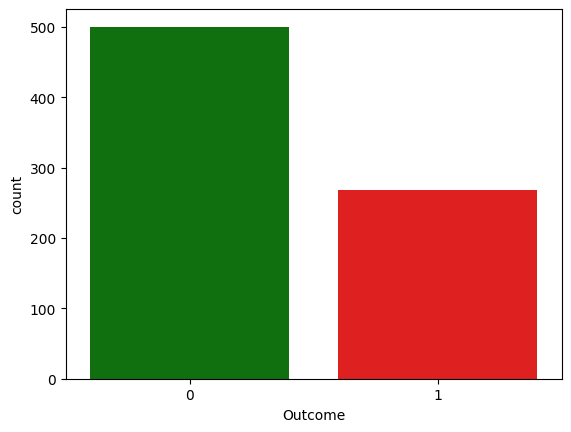

In [17]:
sns.countplot(x = 'Outcome',data = df , palette = ['g','r'])

# Cleaning The Data

### Step-1 Check NAN Values  

In [47]:
df.isnull().sum() /len(df) *100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

### Step-2 Check Duplicates   

In [48]:
df.duplicated().sum()

0

### Step-3 Removing Outliers   

#### Before Removing Outliers Analysis

<Axes: ylabel='Age'>

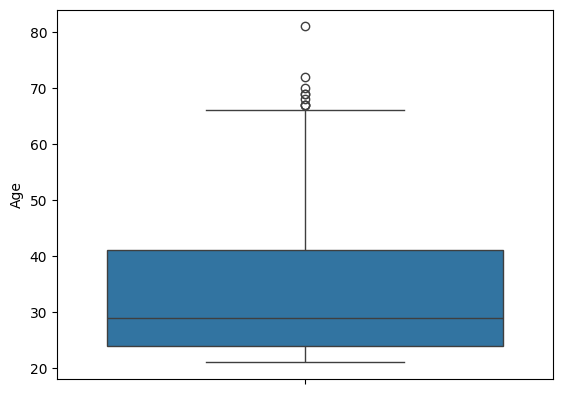

In [301]:
sns.boxplot(df,y='Age')

<Axes: ylabel='BloodPressure'>

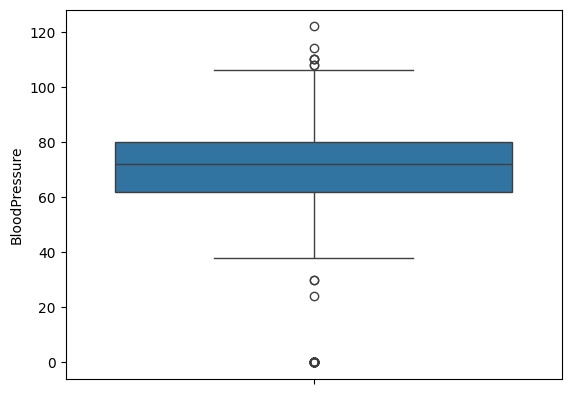

In [ ]:
sns.boxplot(df,y='BloodPressure')

<Axes: ylabel='Glucose'>

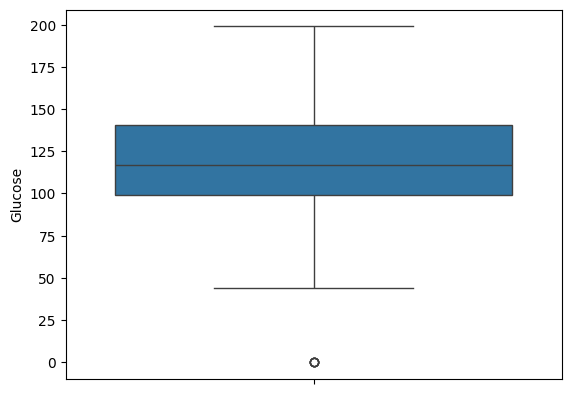

In [ ]:
sns.boxplot(df,y='Glucose')

<Axes: ylabel='Insulin'>

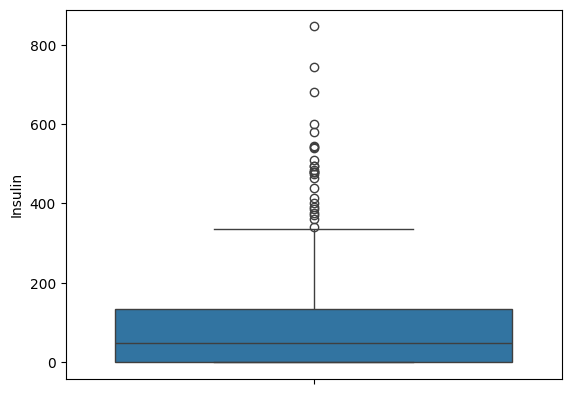

In [ ]:
sns.boxplot(df,y='Insulin')

<Axes: ylabel='Pregnancies'>

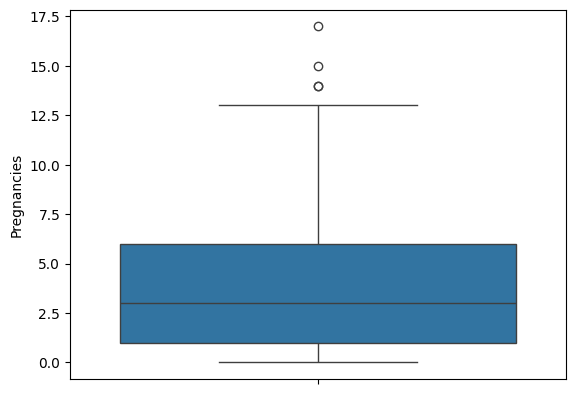

In [ ]:

sns.boxplot(df,y='Pregnancies')

<Axes: ylabel='BMI'>

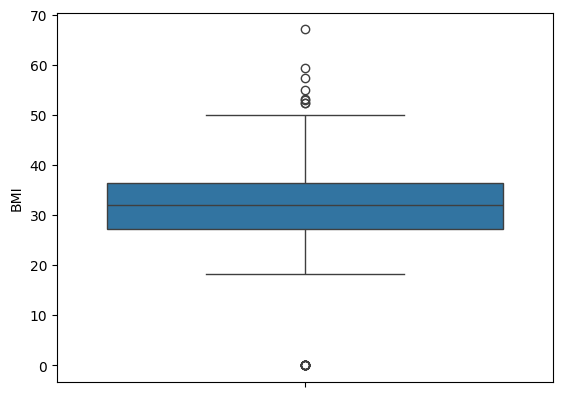

In [ ]:
sns.boxplot(df,y='BMI')

<Axes: ylabel='DiabetesPedigreeFunction'>

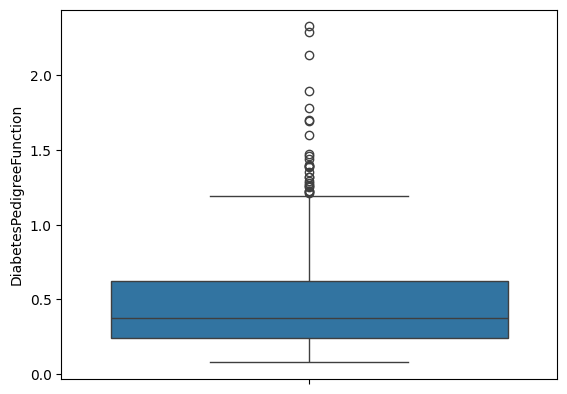

In [ ]:
sns.boxplot(df,y='DiabetesPedigreeFunction')

#### After Removing Outliers Analysis

In [302]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR =Q3-Q1
print(IQR)
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df[(df['Age']>lower_bound)&(df['Age']<upper_bound)]

17.0


<Axes: ylabel='Age'>

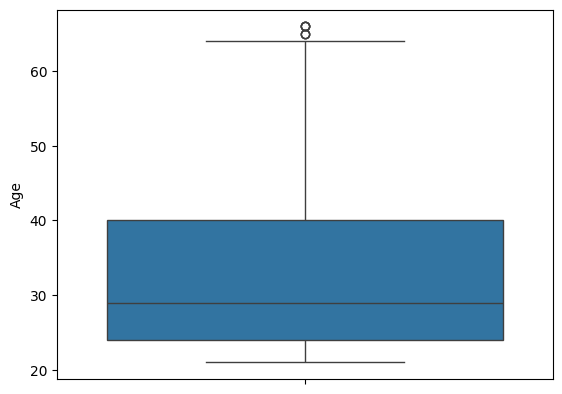

In [303]:
sns.boxplot(df,y='Age')

In [307]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)

IQR =Q3-Q1
print(IQR)
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df[(df['BloodPressure']>lower_bound)&(df['BloodPressure']<upper_bound)]

18.0


<Axes: ylabel='BloodPressure'>

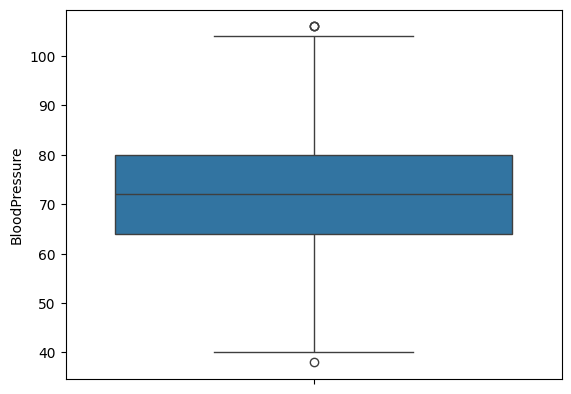

In [308]:
sns.boxplot(df,y='BloodPressure')

In [313]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)

IQR =Q3-Q1
print(IQR)
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df[(df['Glucose']>lower_bound)&(df['Glucose']<upper_bound)]

41.5


<Axes: ylabel='Glucose'>

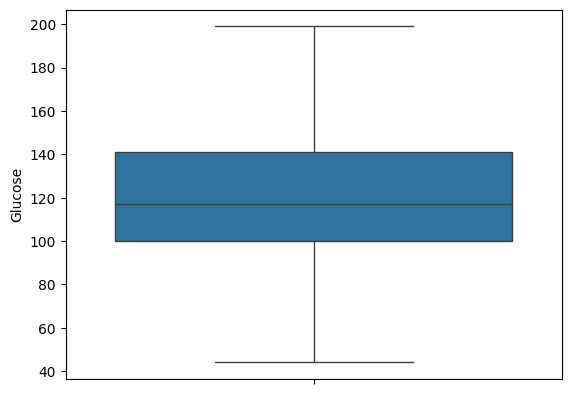

In [314]:
sns.boxplot(df,y='Glucose')

In [318]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)

IQR =Q3-Q1
print(IQR)
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df[(df['Insulin']>lower_bound)&(df['Insulin']<upper_bound)]

134.25


<Axes: ylabel='Insulin'>

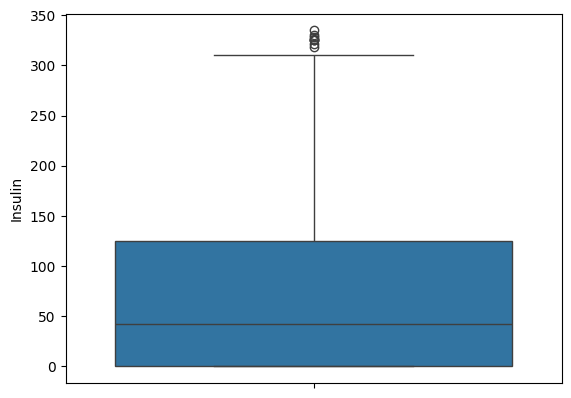

In [319]:
sns.boxplot(df,y='Insulin')

In [21]:
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)

IQR =Q3-Q1
print(IQR)
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df[(df['Pregnancies']>lower_bound)&(df['Pregnancies']<upper_bound)]

5.0


<Axes: ylabel='Pregnancies'>

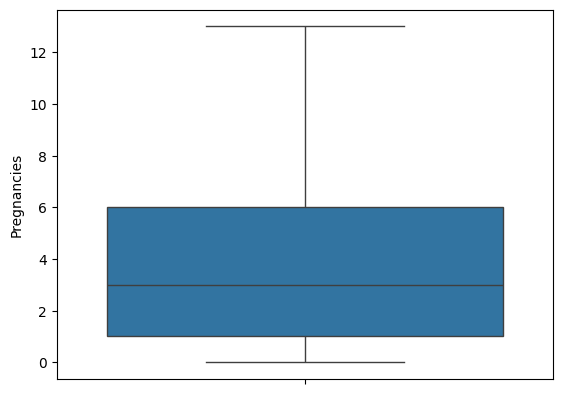

In [22]:
sns.boxplot(df,y='Pregnancies')

In [25]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

IQR =Q3-Q1
print(IQR)
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df[(df['BMI']>lower_bound)&(df['BMI']<upper_bound)]

9.2


<Axes: ylabel='BMI'>

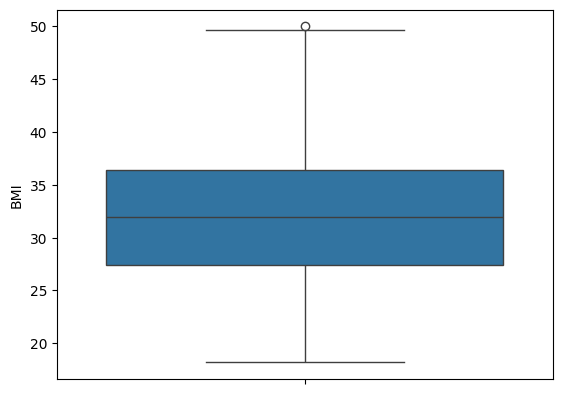

In [26]:
sns.boxplot(df,y='BMI')

In [28]:
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)

IQR =Q3-Q1
print(IQR)
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR

df =df[(df['DiabetesPedigreeFunction']>lower_bound)&(df['DiabetesPedigreeFunction']<upper_bound)]

0.382


<Axes: ylabel='DiabetesPedigreeFunction'>

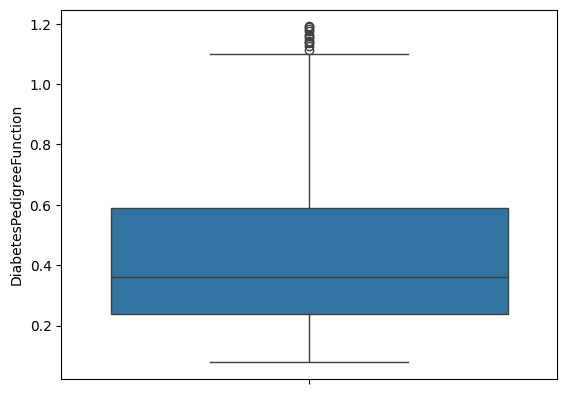

In [29]:
sns.boxplot(df,y='DiabetesPedigreeFunction')

In [30]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Separate features (X) and target variable (y)

In [50]:
X = df.drop('Outcome', axis=1)  # Features for model training
y = df['Outcome']              # Target variable for prediction

## Splits the data into training and testing sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning Algorithms

In [52]:
# create instances of machine learning algorithms classes

logistic = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)
random_forest = RandomForestClassifier()
gradient_boost = GradientBoostingClassifier()

In [53]:
# Function to Evaluates a machine learning model's performanc

def models(model):
    # Print model information
    print("Evaluating Model Name :", model)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    prediction = model.predict(X_test)

    # Evaluate model performance using various metrics

    # Accuracy: Proportion of correct predictions
    accuracy = accuracy_score(prediction, y_test)
    print("Accuracy Score :", accuracy)

    # Recall: Proportion of true positives correctly identified
    recall = recall_score(prediction, y_test)
    print("Recall Score :", recall)

    # F1 Score: Harmonic mean of precision and recall
    f1 = f1_score(prediction, y_test)
    print("F1 Score :", f1)
    sns.heatmap(confusion_matrix(prediction, y_test), annot=True ,fmt = '0.2f',linewidth = .9)

## 1- Logistic Regression

Evaluating Model Name : LogisticRegression()
Accuracy Score : 0.8472222222222222
Recall Score : 0.7575757575757576
F1 Score : 0.6944444444444444


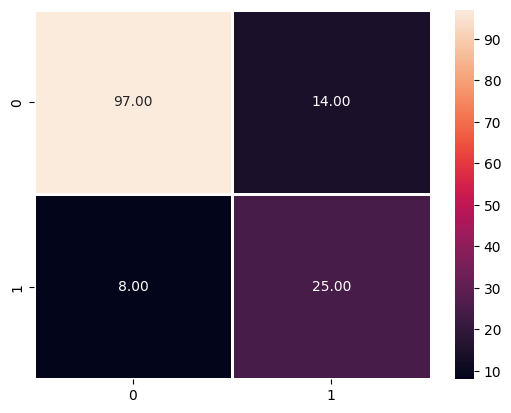

In [56]:
models(logistic)

## 2- KNeighbors Classifier

Evaluating Model: KNeighborsClassifier()
Accuracy Score: 0.7569444444444444
Recall Score: 0.5526315789473685
F1 Score: 0.5454545454545454


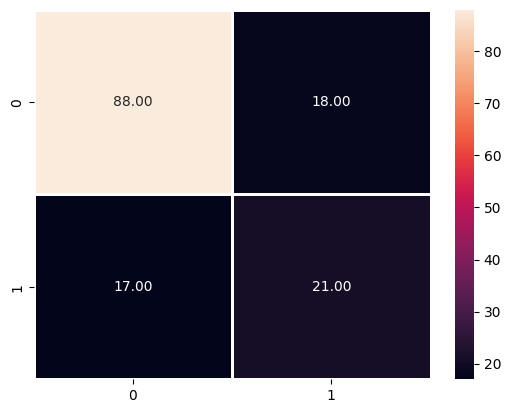

In [37]:
models(knn)

## 3- Random Forest Classifier

Evaluating Model: RandomForestClassifier()
Accuracy Score: 0.8472222222222222
Recall Score: 0.7297297297297297
F1 Score: 0.7105263157894737


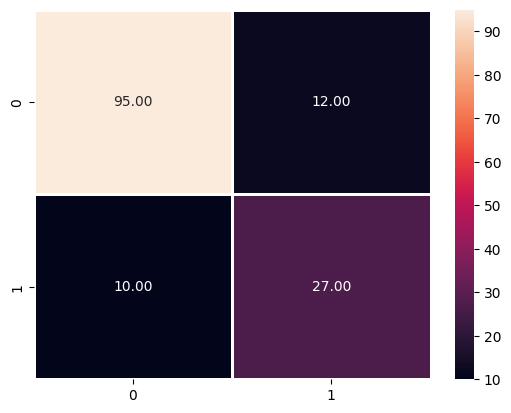

In [38]:
models(random_forest)

### 4- Gradient Boosting Classifier

Evaluating Model Name : GradientBoostingClassifier()
Accuracy Score : 0.8402777777777778
Recall Score : 0.7222222222222222
F1 Score : 0.6933333333333334


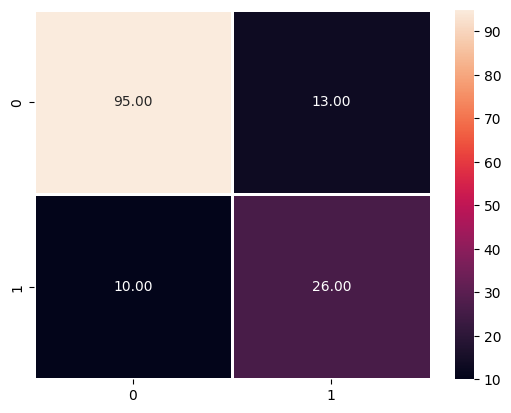

In [57]:
models(gradient_boost)